# Questionário 5



Hugo de Oliveira Borges  nUSP: $11915202$

### Leitura de Dados

In [331]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import normalized_mutual_info_score
import numpy as np
import matplotlib.pyplot as plt

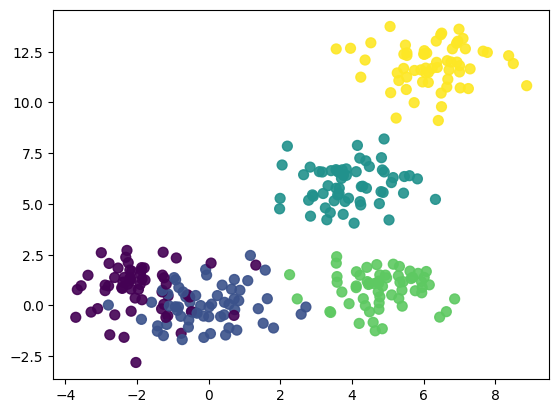

In [332]:
np.random.seed(201)
# create blobs
c = [(-2,1),(0,0),(4,6),(5,1),(6,12)]
n=300
data = make_blobs(n_samples=n, n_features=2, centers=c, cluster_std=1, random_state=50)
X = data[0]
labels = data[1]
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50, alpha=0.9)
plt.show(True)


1 - Considere os dados gerados pelo código abaixo. Usando o método k-means e a medida
normalized mutual information, determine o número ideal de clusters para os dados abaixo. Veja
o exemplo da aula.

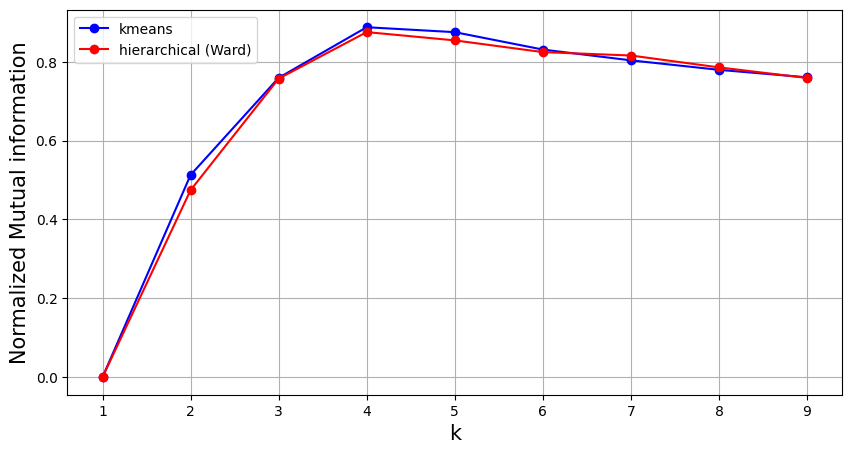

In [333]:
from scipy.spatial.distance import cdist
from sklearn import cluster  # Importing the cluster module

NMI_km = []
NMI_hr = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_km = kmeans.fit_predict(X)
    NMI_km.append(normalized_mutual_info_score(y_km, data[1], average_method='arithmetic'))
    clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage='ward')
    y_hr = clustering.fit_predict(X)
    NMI_hr.append(normalized_mutual_info_score(y_hr, data[1], average_method='arithmetic'))
plt.figure(figsize=(10,5))
plt.plot(K, NMI_km, '-bo', label = 'kmeans')
plt.plot(K, NMI_hr, '-ro', label = 'hierarchical (Ward)')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Normalized Mutual information', fontsize = 15)
plt.grid(True)
plt.legend()
plt.show()

In [334]:
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import silhouette_score

print('K-means:')
print('Adjusted rand score:', adjusted_rand_score(y_km, data[1]))
print('Mutual information score:', normalized_mutual_info_score(y_km, data[1], average_method='arithmetic'))
print('Silhouette score:', silhouette_score(X, y_km, metric='euclidean'))
print('\n')


K-means:
Adjusted rand score: 0.6332158807338467
Mutual information score: 0.7604570328491421
Silhouette score: 0.3955833859206263




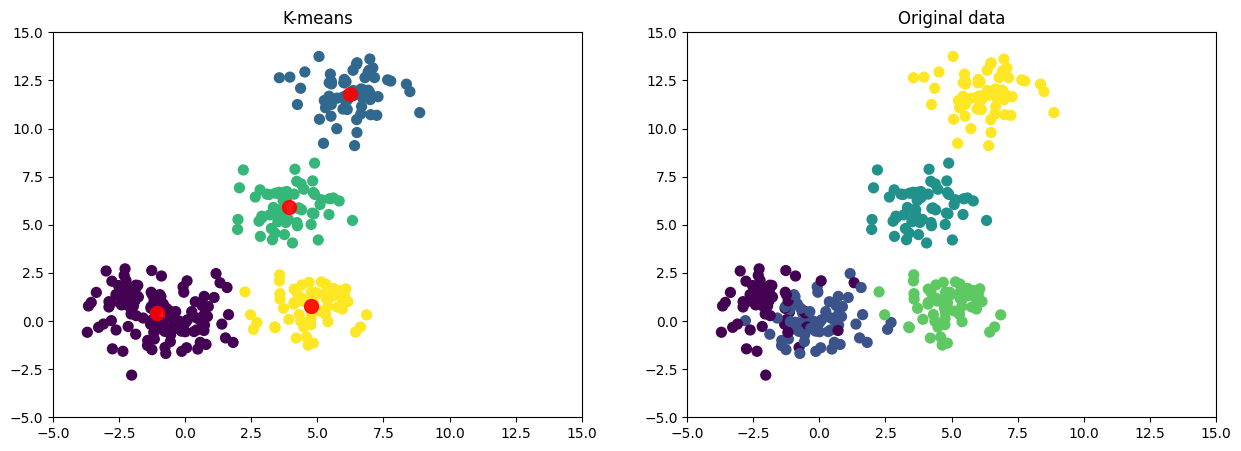

In [335]:
from sklearn.cluster import KMeans

k = 4 # numero de clusters a serem identificados
# define o método com k clusters
kmeans = KMeans(n_clusters=k) 
# realiza o ajuste considerando os dados X
kmeans.fit(X)
# faz a predição, identificando os clusters
y_km = kmeans.fit_predict(X)
# define o tamanha da figura
plt.figure(figsize=(15,5))
# mostra o primeiro gráfico
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis', s=50)
plt.xlim(-5,15)
plt.ylim(-5,15)
plt.title('K-means')
centers = kmeans.cluster_centers_
# mostra os centróides obtidos
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.9); #show the cluster centers
# mostra o segundo gráfico
plt.subplot(1,2, 2)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50)
plt.xlim(-5,15)
plt.ylim(-5,15)
plt.title('Original data')
plt.show(True)

Vemos que o número de ideal de clusters é $k = 4$

2 - Repita a análise feita no notebook da aula para dados gerados usando a função make_circles
(https://scikit-learn.org/stable/datasets/index.html#sample-generators). Varie o número de
observações e veja como se comporta o agrupamento. Avalie usando Coeficiente de Silhueta.

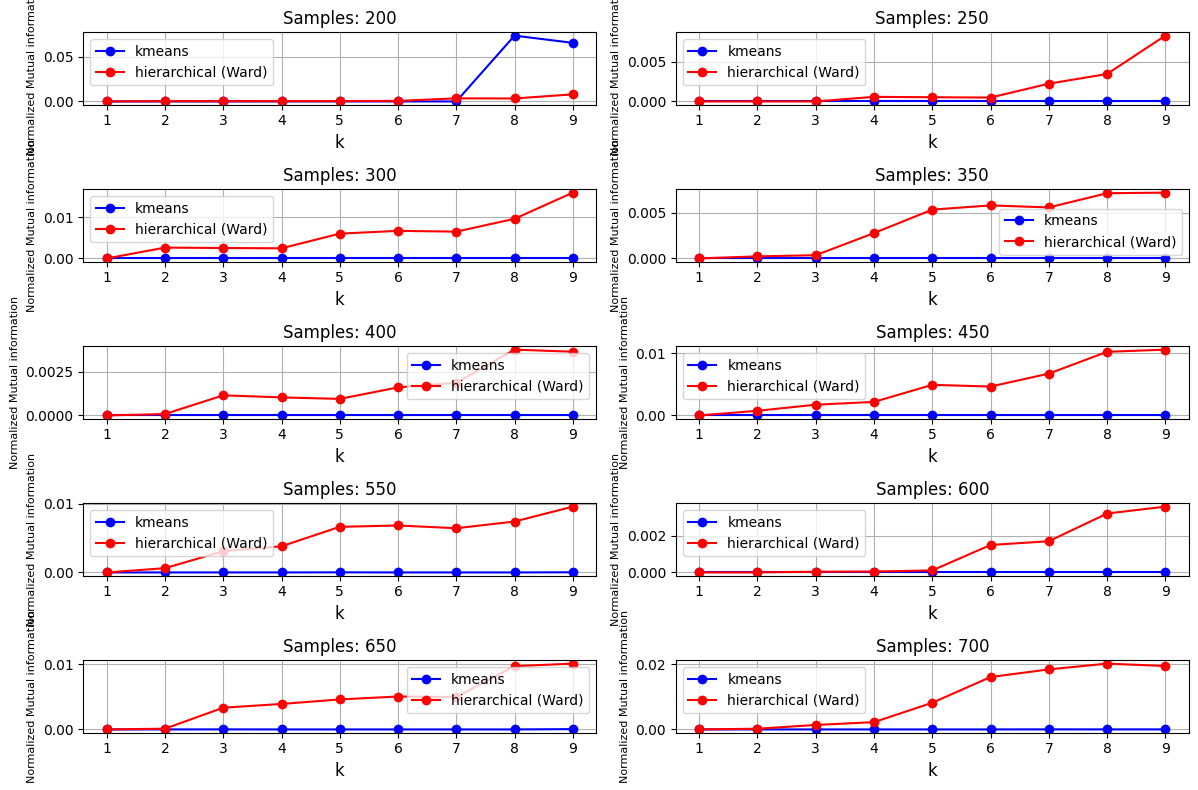

In [381]:
from scipy.spatial.distance import cdist
from sklearn import cluster 
from sklearn.datasets import make_circles

K = range(1, 10, 1)

sample_sizes = [200, 250, 300, 350, 400, 450, 550, 600, 650, 700]
plt.figure(figsize=(12, 8))

for i, n_samples in enumerate(sample_sizes):
    data = make_circles(n_samples=n_samples, random_state=42, factor=0.7)  # Fixed random_state for consistency
    X = data[0]
    labels = data[1]

    NMI_km = []
    NMI_hr = []
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        y_km = kmeans.fit_predict(X)
        NMI_km.append(normalized_mutual_info_score(y_km, labels, average_method='arithmetic'))
        
        clustering = cluster.AgglomerativeClustering(n_clusters=k, linkage='ward')
        y_hr = clustering.fit_predict(X)
        NMI_hr.append(normalized_mutual_info_score(y_hr, labels, average_method='arithmetic'))

    plt.subplot(5, 2, i + 1)
    plt.plot(K, NMI_km, '-bo', label='kmeans')
    plt.plot(K, NMI_hr, '-ro', label='hierarchical (Ward)')
    plt.title(f'Samples: {n_samples}')
    plt.xlabel('k', fontsize=12)
    plt.ylabel('Normalized Mutual information', fontsize=8)
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

In [379]:
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import silhouette_score

print('K-means:')
print('Adjusted rand score:', adjusted_rand_score(y_km, data[1]))
print('Mutual information score:', normalized_mutual_info_score(y_km, data[1], average_method='arithmetic'))
print('Silhouette score:', silhouette_score(X, y_km, metric='euclidean'))
print('\n')


K-means:
Adjusted rand score: -0.00254130239862899
Mutual information score: 1.3011466133980495e-05
Silhouette score: 0.38083102112700584




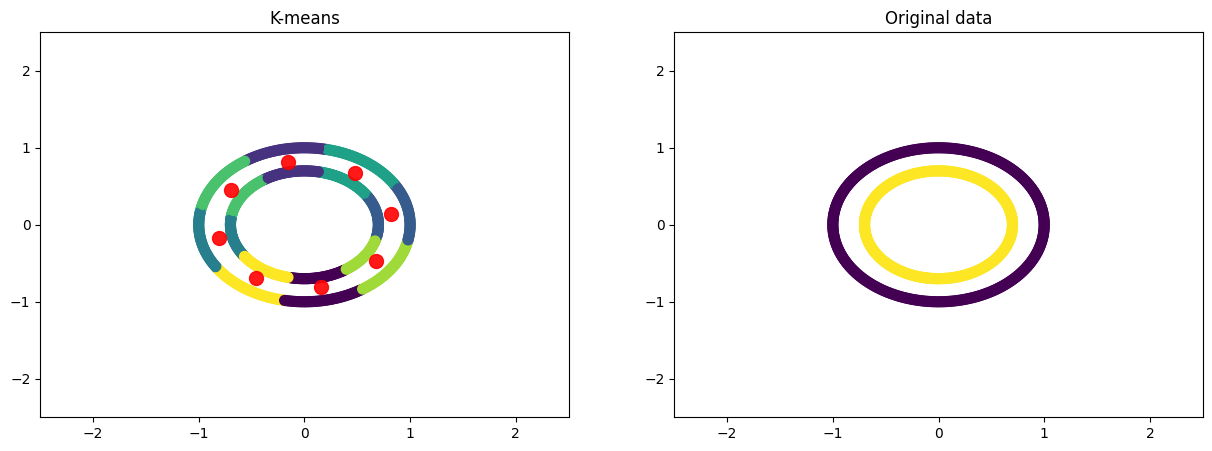

In [383]:
from sklearn.cluster import KMeans

k = 8 # numero de clusters a serem identificados
# define o método com k clusters
kmeans = KMeans(n_clusters=k) 
# realiza o ajuste considerando os dados X
kmeans.fit(X)
# faz a predição, identificando os clusters
y_km = kmeans.fit_predict(X)
# define o tamanha da figura
plt.figure(figsize=(15,5))
# mostra o primeiro gráfico
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], c=y_km, cmap='viridis', s=50)
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.title('K-means')
centers = kmeans.cluster_centers_
# mostra os centróides obtidos
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.9); #show the cluster centers
# mostra o segundo gráfico
plt.subplot(1,2, 2)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50)
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.title('Original data')
plt.show(True)

Como o K-means tenta cortar os círculos em setores lineares, independente do tanto de ponto utilizados, não vai alterar nada o score do modelo.